In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/117.atr
/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/207.xws
/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/212.xws
/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/103.dat
/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/106.hea
/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/113.dat
/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/202.dat
/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/109.xws
/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/217.dat
/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/111.atr
/kaggle/input/mit-bi

In [26]:
!pip install wfdb
import wfdb

# Load a sample ECG record from the correct path
record = wfdb.rdrecord('/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/100')

# Display record information
print(record.__dict__)

{'record_name': '100', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 650000, 'base_time': None, 'base_date': None, 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'], 'sig_name': ['MLII', 'V5'], 'p_signal': array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['100.dat', '100.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [1024, 1024], 'units': ['mV', 'mV'], 'adc_res': [11, 11], 'adc_zero': [1024, 1024], 'init_value': [995, 1011], 'checksum': [-22131, 20052], 'block_size': [0, 0]}


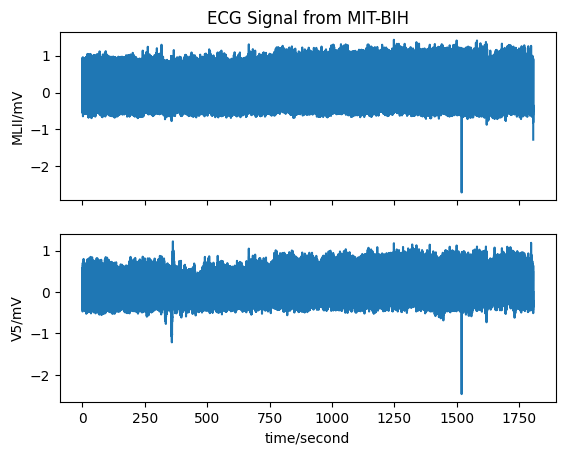

In [27]:
# Plot the ECG signal
wfdb.plot_wfdb(record=record, title='ECG Signal from MIT-BIH')

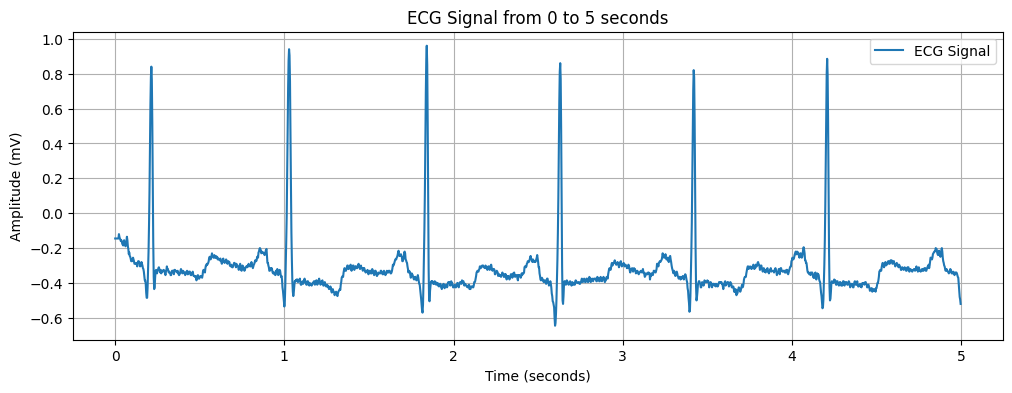

In [28]:
import matplotlib.pyplot as plt

# Load the record (make sure to use the correct path)
record = wfdb.rdrecord('/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/100')

# Extract the signal and sampling frequency
signal = record.p_signal[:, 0]  # Extract the first lead (channel)
sampling_frequency = record.fs  # Sampling frequency in Hz

# Time range (in seconds)
start_time = 0  # start at 0 seconds
end_time = 5  # end at 360 seconds

# Convert time range to sample indices
start_sample = int(start_time * sampling_frequency)
end_sample = int(end_time * sampling_frequency)

# Slice the signal for the specified time range
signal_segment = signal[start_sample:end_sample]

# Generate time values for the x-axis (in seconds)
time_values = [i / sampling_frequency for i in range(start_sample, end_sample)]

# Plot the ECG signal segment
plt.figure(figsize=(12, 4))
plt.plot(time_values, signal_segment, label='ECG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (mV)')
plt.title('ECG Signal from 0 to 5 seconds')
plt.grid()
plt.legend()
plt.show()

In [29]:
record_name = '/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0/100'

# Load the annotation data (e.g., 'atr' is the annotation file extension)
annotation = wfdb.rdann(record_name, 'atr')
print(annotation.__dict__)  # To view annotation details

{'record_name': '100', 'extension': 'atr', 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991]), 'symbol': ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [30]:
# Extract the R-peak locations and corresponding labels
r_peaks = annotation.sample  # R-peak locations (in samples)
labels = annotation.symbol   # Beat labels (e.g., 'N' for normal, 'V' for PVC, etc.)

# View the first few R-peak locations and labels
for i in range(10):  # Displaying the first 10 annotations
    print(f"R-peak at sample {r_peaks[i]} with label {labels[i]}")

R-peak at sample 18 with label +
R-peak at sample 77 with label N
R-peak at sample 370 with label N
R-peak at sample 662 with label N
R-peak at sample 946 with label N
R-peak at sample 1231 with label N
R-peak at sample 1515 with label N
R-peak at sample 1809 with label N
R-peak at sample 2044 with label A
R-peak at sample 2402 with label N


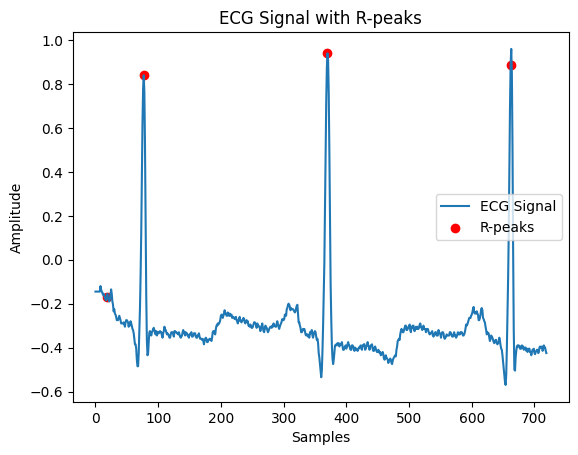

In [31]:
# Plot a segment of the ECG signal (e.g., first 5000 samples)
signal = record.p_signal[:, 0]  # Get the first channel (MLII lead, for example)
plt.plot(signal[:720], label="ECG Signal")

# Plot the R-peaks (highlighting their locations on the plot)
r_peak_indices = r_peaks[r_peaks < 720]  # Only plot R-peaks within the first 5000 samples
plt.scatter(r_peak_indices, signal[r_peak_indices], color='red', label="R-peaks")

plt.title('ECG Signal with R-peaks')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os

# Path to the dataset
data_path = '/kaggle/input/mit-bih/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0'

# Get all record names in the dataset
record_names = [f[:-4] for f in os.listdir(data_path) if f.endswith('.atr')]

# Initialize lists to store beats and labels
ecg_beats = []
ecg_labels = []

# Function to extract MLII lead from the record
def get_ml2_channel(record):
    if "MLII" in record.sig_name:
        # Find index of the MLII channel
        ml2_index = record.sig_name.index("MLII")
        return record.p_signal[:, ml2_index]
    else:
        return None

# Iterate over each record
for record_name in record_names:
    # Load the record header to check the channel names
    try:
        record = wfdb.rdrecord(os.path.join(data_path, record_name))
        annotation = wfdb.rdann(os.path.join(data_path, record_name), 'atr')

        # Get the MLII channel (if it exists)
        ml2_signal = get_ml2_channel(record)

        if ml2_signal is None:
            print(f"Record {record_name} does not contain MLII. Skipping...")
            continue  # Skip this record if no MLII channel is found

        # Extract beats using R peaks
        r_peaks = annotation.sample
        labels = annotation.symbol

        # Only keep beats with labels N, L, R, A, V
        valid_labels = ['N', 'L', 'R', 'A', 'V']

        for i, r_peak in enumerate(r_peaks):
            if labels[i] in valid_labels:
                # Make sure the beat is within valid range for slicing
                if r_peak > 179 and r_peak < len(ml2_signal) - 180:
                    beat = ml2_signal[r_peak - 179:r_peak + 180 + 1]
                    ecg_beats.append(beat)
                    ecg_labels.append(labels[i])

    except Exception as e:
        print(f"Error processing {record_name}: {e}")

# Convert beats and labels to numpy arrays for further processing
ecg_beats = np.array(ecg_beats)
ecg_labels = np.array(ecg_labels)

print(f"Extracted {len(ecg_beats)} beats from records with MLII lead.")

In [ ]:
print(ecg_beats.shape)
print(ecg_labels.shape)

In [ ]:
import torch

plt.plot(ecg_beats[100])
plt.plot(ecg_beats[5340])
# plt.plot(ecg_beats[87564])

print(ecg_beats[100].shape)

ecg_beats_tensor = torch.tensor(ecg_beats, dtype=torch.float32).unsqueeze(-1)

In [ ]:
# Normalize ECG beats
ecg_beats_normalized = (ecg_beats - ecg_beats.mean(axis=1, keepdims=True)) / ecg_beats.std(axis=1, keepdims=True)
plt.plot(ecg_beats_normalized[100])
# plt.plot(ecg_beats_normalized[5340])
# plt.plot(ecg_beats_normalized[87564])

In [ ]:
# Wavelet denoising algorithm

import pywt
import numpy as np

def wavelet_denoise(data, wavelet='db8', level=4):
    """
    Apply wavelet denoising using Daubechies 8 (db8) wavelet.

    Parameters:
    - data: 2D numpy array where each row is an ECG beat
    - wavelet: Type of wavelet to use for denoising
    - level: Decomposition level for wavelet transform

    Returns:
    - Denoised ECG data in the same shape as input
    """
    denoised_data = []
    for ecg_beat in data:
        # Perform wavelet decomposition
        coeffs = pywt.wavedec(ecg_beat, wavelet, level=level)
        
        # Apply thresholding to remove noise
        sigma = np.median(np.abs(coeffs[-level])) / 0.6745
        threshold = sigma * np.sqrt(2 * np.log(len(ecg_beat)))
        denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
        
        # Reconstruct the denoised signal
        denoised_ecg_beat = pywt.waverec(denoised_coeffs, wavelet)
        
        # Ensure the reconstructed signal has the same length
        denoised_ecg_beat = denoised_ecg_beat[:len(ecg_beat)]
        denoised_data.append(denoised_ecg_beat)
    
    return np.array(denoised_data)

# Example usage with your ECG data
ecg_beats_denoised = wavelet_denoise(ecg_beats_normalized, wavelet='db8', level=4)

In [ ]:
plt.plot(ecg_beats_denoised[100])
# plt.plot(ecg_beats_denoised[5340])
# plt.plot(ecg_beats_denoised[87564])

In [ ]:
# Implemented LSTM-AE model

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# LSTM Encoder
class Encoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=32):
        super(Encoder, self).__init__()
        self.seq_len = seq_len
        self.embedding_dim = embedding_dim
        self.lstm = nn.LSTM(n_features, self.embedding_dim, batch_first=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x, (hidden, _) = self.lstm(x)
        encoded = self.sigmoid(hidden[-1])
        return encoded

# LSTM Decoder
class Decoder(nn.Module):
    def __init__(self, seq_len, embedding_dim, n_features):
        super(Decoder, self).__init__()
        self.seq_len = seq_len
        self.embedding_dim = embedding_dim
        self.lstm = nn.LSTM(embedding_dim, embedding_dim, batch_first=True)
        self.output_layer = nn.Linear(self.embedding_dim, n_features)

    def forward(self, x):
        x = x.unsqueeze(1).repeat(1, self.seq_len, 1)
        x, _ = self.lstm(x)
        x = self.output_layer(x)
        return x

# LSTM Autoencoder
class LSTMAutoEncoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=32):
        super(LSTMAutoEncoder, self).__init__()
        self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
        self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Hyperparameters
seq_len = 360
n_features = 1
embedding_dim = 32
batch_size = 128
epochs = 100
learning_rate = 0.001

In [ ]:
# SVM kernels

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define kernels and hyperparameters
kernels = {
    "Linear": {"kernel": "linear"},
    "Quadratic": {"kernel": "poly", "degree": 2},
    "Fine Gaussian": {"kernel": "rbf", "gamma": 0.1},
    "Medium Gaussian": {"kernel": "rbf", "gamma": "scale"},
    "Coarse Gaussian": {"kernel": "rbf", "gamma": 0.01}
}

# Initialize a results list to store metrics for each kernel
results = {kernel_name: {"accuracy": [], "sensitivity": [], "specificity": []} for kernel_name in kernels.keys()}

# Helper function to calculate sensitivity and specificity
def calculate_sensitivity_specificity(cm):
    sensitivities, specificities = [], []
    for i in range(len(cm)):
        tp = cm[i, i]
        fn = sum(cm[i, :]) - tp
        fp = sum(cm[:, i]) - tp
        tn = cm.sum() - (tp + fn + fp)

        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivities.append(sensitivity)
        specificities.append(specificity)

    avg_sensitivity = np.mean(sensitivities)
    avg_specificity = np.mean(specificities)
    return avg_sensitivity, avg_specificity

In [ ]:
# Create a mapping from labels to integers
label_mapping = {'N': 0, 'L': 1, 'R': 2, 'A': 3, 'V': 4}

# Convert string labels to integers
ecg_labels_numeric = np.array([label_mapping[label] for label in ecg_labels])

In [ ]:
# This code is for best based 10 fold cross validation approach

# Convert to PyTorch tensors
ecg_labels_tensor = torch.tensor(ecg_labels, dtype=torch.long)  # Convert labels to tensor
ecg_beats_tensor = torch.tensor(ecg_beats_denoised, dtype=torch.float32).unsqueeze(-1)
dataset = TensorDataset(ecg_beats_tensor, ecg_labels_tensor)  # Combine beats and labels

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 10-Fold Cross-Validation Loop
for fold, (train_idx, test_idx) in enumerate(kf.split(dataset)):
    print(f"\nStarting Fold {fold + 1} for normalized data")
    losses = []
    val_losses = []
    
    # Split indices for train, validation, and test datasets
    train_end = int(len(train_idx) * 0.8)
    val_idx, train_idx = train_idx[train_end:], train_idx[:train_end]

    # Prepare normalized datasets for this fold
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    train_data = torch.stack([data[0] for data in train_dataset])
    test_data = torch.stack([data[0] for data in test_dataset])

    # Save train, validation, and test labels
    train_labels = [ecg_labels.numpy() for _, ecg_labels in train_loader]
    val_labels = [ecg_labels.numpy() for _, ecg_labels in val_loader]
    test_labels = [ecg_labels.numpy() for _, ecg_labels in test_loader]

    train_labels = np.concatenate(train_labels)
    val_labels = np.concatenate(val_labels)
    test_labels = np.concatenate(test_labels)
    
    # Initialize model, loss function, and optimizer for this fold
    model = LSTMAutoEncoder(seq_len, n_features, embedding_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop for normalized data
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for batch in train_loader:
            ecg_batch = batch[0].to(device)
            optimizer.zero_grad()
            output = model(ecg_batch)
            loss = criterion(output, ecg_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        # Calculate average train loss
        avg_train_loss = train_loss / len(train_loader)
        losses.append(avg_train_loss)

        # Validation loop
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                ecg_batch = batch[0].to(device)
                output = model(ecg_batch)
                loss = criterion(output, ecg_batch)
                val_loss += loss.item()

        # Calculate average validation loss
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
    
    print(f"\nTraining completed for fold {fold + 1}")
    
    # Plot training and validation loss
    plt.plot(range(1, epochs + 1), losses, label="Training Loss", marker='o')
    plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss", marker='x')
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title(f"Training and Validation Loss Over Epochs (Fold {fold + 1})")
    plt.legend()
    plt.show()
    
    # Save encoded features to CSV for SVM
    model.eval()
    encoded_features = []
    
    with torch.no_grad():
        for batch in train_loader:
            ecg_batch = batch[0].to(device)
            encoded = model.encoder(ecg_batch)
            encoded_features.append(encoded.squeeze(0).cpu().numpy())

    encoded_features = np.vstack(encoded_features)
    
    # Add labels as the last column
    labeled_encoded_features = np.hstack((encoded_features, train_labels.reshape(-1, 1)))

    np.save(f"fold_{fold+1}_encoded_features.npy", labeled_encoded_features)
    # Flatten train and test beats for SVM
    # X_train = train_data.squeeze(-1).reshape(train_data.size(0), -1).numpy()
    # X_test = test_data.squeeze(-1).reshape(test_data.size(0), -1).numpy()
    # y_train = train_labels
    # y_test = test_labels
    
    # for kernel_name, params in kernels.items():
    #     print(f"\n starting kernel {kernel_name}")
    #     # Initialize SVM model with specified kernel and parameters
    #     svm_model = SVC(**params, C=1.0, decision_function_shape='ovo')
    #     # Train the model
    #     svm_model.fit(X_train, y_train)
    #     # Predict on the test set
    #     y_pred = svm_model.predict(X_test)
    #     # Calculate accuracy
    #     accuracy = accuracy_score(y_test, y_pred)
    #     # Calculate confusion matrix
    #     cm = confusion_matrix(y_test, y_pred)
    #     # Calculate sensitivity and specificity
    #     sensitivity, specificity = calculate_sensitivity_specificity(cm)
    #     # Append fold results to the kernel's metrics
    #     results[kernel_name]["accuracy"].append(accuracy)
    #     results[kernel_name]["sensitivity"].append(sensitivity)
    #     results[kernel_name]["specificity"].append(specificity)

    # Print results in a table format
    # print(f"Kernel Comparison Results for DS1 fold {fold+1}")
    # print("{:<15} {:<10} {:<15} {:<15}".format("Kernel", "Accuracy", "Sensitivity", "Specificity"))
    # for row in results:
    #     print("{:<15} {:.4f}     {:.4f}         {:.4f}".format(row[0], row[1], row[2], row[3]))


# Calculate and display the average metrics for each kernel
# print("\nFinal Kernel Comparison Results:")
# print("{:<15} {:<15} {:<15} {:<15}".format("Kernel", "Avg Accuracy", "Avg Sensitivity", "Avg Specificity"))

# for kernel_name, metrics in results.items():
#     avg_accuracy = np.mean(metrics["accuracy"])
#     avg_sensitivity = np.mean(metrics["sensitivity"])
#     avg_specificity = np.mean(metrics["specificity"])
    
#     print("{:<15} {:.4f}         {:.4f}         {:.4f}".format(kernel_name, avg_accuracy, avg_sensitivity, avg_specificity))

print("\nAll completed")

In [ ]:
# Below code is for generating the ECG beats for record based approach

# Define the mapping of test records for each fold
test_record_folds = {
    1: ['100', '101', '109', '118', '217'],
    2: ['105', '106', '107', '111', '124'],
    3: ['105', '112', '113', '114', '207'],
    4: ['106', '116', '117', '212', '214'],
    5: ['107', '109', '122', '123', '231'],
    6: ['111', '202', '203', '217', '232'],
    7: ['106', '118', '207', '209', '210'],
    8: ['105', '124', '214', '215', '219'],
    9: ['109', '207', '217', '222'],
    10: ['106', '111', '212', '233'],
}


# Iterate over each fold
for fold, test_records in test_record_folds.items():
    print(f"Processing fold {fold}...")

    # Initialize lists for training and testing beats
    train_beats, train_labels = [], []
    test_beats, test_labels = [], []

    # Identify training records (all records except the test records for the current fold)
    train_records = [record for record in record_names if record not in test_records]

    # Process training records
    for record_name in train_records:
        try:
            record = wfdb.rdrecord(os.path.join(data_path, record_name))
            annotation = wfdb.rdann(os.path.join(data_path, record_name), 'atr')

            # Extract MLII channel
            ml2_signal = get_ml2_channel(record)

            if ml2_signal is None:
                print(f"Record {record_name} does not contain MLII. Skipping...")
                continue

            # Extract beats and labels
            r_peaks = annotation.sample
            labels = annotation.symbol
            valid_labels = ['N', 'L', 'R', 'A', 'V']

            for i, r_peak in enumerate(r_peaks):
                if labels[i] in valid_labels:
                    if r_peak > 179 and r_peak < len(ml2_signal) - 180:
                        beat = ml2_signal[r_peak - 179:r_peak + 180 + 1]
                        train_beats.append(beat)
                        train_labels.append(labels[i])
        except Exception as e:
            print(f"Error processing {record_name} (training): {e}")

    # Process test records
    for record_name in test_records:
        try:
            record = wfdb.rdrecord(os.path.join(data_path, record_name))
            annotation = wfdb.rdann(os.path.join(data_path, record_name), 'atr')

            # Extract MLII channel
            ml2_signal = get_ml2_channel(record)

            if ml2_signal is None:
                print(f"Record {record_name} does not contain MLII. Skipping...")
                continue

            # Extract beats and labels
            r_peaks = annotation.sample
            labels = annotation.symbol
            valid_labels = ['N', 'L', 'R', 'A', 'V']

            for i, r_peak in enumerate(r_peaks):
                if labels[i] in valid_labels:
                    if r_peak > 179 and r_peak < len(ml2_signal) - 180:
                        beat = ml2_signal[r_peak - 179:r_peak + 180 + 1]
                        test_beats.append(beat)
                        test_labels.append(labels[i])
        except Exception as e:
            print(f"Error processing {record_name} (testing): {e}")

    # Convert beats and labels to numpy arrays
    train_beats = np.array(train_beats)
    train_labels = np.array(train_labels)
    test_beats = np.array(test_beats)
    test_labels = np.array(test_labels)

    train_beats = (train_beats - train_beats.mean(axis=1, keepdims=True)) / train_beats.std(axis=1, keepdims=True)
    test_beats = (test_beats - test_beats.mean(axis=1, keepdims=True)) / test_beats.std(axis=1, keepdims=True)

    train_beats = wavelet_denoise(train_beats, wavelet='db8', level=4)
    test_beats = wavelet_denoise(test_beats, wavelet='db8', level=4)
    # Save the training and testing datasets for this fold
    np.savez(f"fold_{fold}_dataset.npz", train_beats=train_beats, train_labels=train_labels, test_beats=test_beats, test_labels=test_labels)

    print(f"Fold {fold} processed: {len(train_beats)} training beats, {len(test_beats)} testing beats.")

In [ ]:
# Training the model using record based 10 fold cross validation approach

for fold in range(1, 11):
    print(f"\nStarting Fold {fold}")
    
    # Load dataset
    dataset_path = f"fold_{fold}_dataset.npz"
    data = np.load(dataset_path)
    train_beats, train_labels = data['train_beats'], data['train_labels']
    test_beats, test_labels = data['test_beats'], data['test_labels']
    
    # Convert to PyTorch tensors
    train_labels = np.array([label_mapping[label] for label in train_labels])
    test_labels = np.array([label_mapping[label] for label in test_labels])
    
    train_beats_tensor = torch.tensor(train_beats, dtype=torch.float32).unsqueeze(-1)
    train_labels_tensor = torch.tensor(train_labels, dtype=torch.int).unsqueeze(-1)
    test_beats_tensor = torch.tensor(test_beats, dtype=torch.float32).unsqueeze(-1)
    test_labels_tensor = torch.tensor(test_labels, dtype=torch.int).unsqueeze(-1)

    # Create datasets
    train_dataset = TensorDataset(train_beats_tensor, train_labels_tensor)
    test_dataset = TensorDataset(test_beats_tensor, test_labels_tensor)
    
    # Optionally split train dataset for validation
    train_size = int(0.8 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize model, optimizer, and loss function
    model = LSTMAutoEncoder(seq_len, n_features, embedding_dim).to(device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training and validation
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for batch in train_loader:
            ecg_batch, _ = batch  # Ignore labels for autoencoder
            ecg_batch = ecg_batch.to(device)
            optimizer.zero_grad()
            output = model(ecg_batch)
            loss = criterion(output, ecg_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                ecg_batch, _ = batch
                ecg_batch = ecg_batch.to(device)
                output = model(ecg_batch)
                loss = criterion(output, ecg_batch)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    
    # Plot losses
    plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
    plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title(f"Fold {fold} Losses")
    plt.legend()
    plt.show()
    
    # Extract and save encoded features
    model.eval()
    encoded_features = []
    labels = []
    with torch.no_grad():
        for batch in train_loader:
            ecg_batch, ecg_labels = batch
            ecg_batch = ecg_batch.to(device)
            encoded = model.encoder(ecg_batch)  # Extract encoded features
            encoded_features.append(encoded.cpu().numpy())
            labels.append(ecg_labels.numpy())
    
    # Concatenate all features and labels
    encoded_features = np.vstack(encoded_features)
    labels = np.concatenate(labels)
    
    # Save encoded features and labels as .npy files
    labeled_encoded_features = np.hstack((encoded_features, labels.reshape(-1, 1)))
    np.save(f"fold_{fold}_encoded_features.npy", labeled_encoded_features)

print("Training for all folds completed.")

In [ ]:
# This code is used to generate ECG beats using the trained model

import torch
import matplotlib.pyplot as plt

model_path = "/kaggle/working/encoded_features_3.npy"

# Load the model's state_dict
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()

# Select one test sample (e.g., the first beat)
test_sample = ecg_beats_tensor[0].unsqueeze(0).to(device)  # Add batch dimension for a single sample

# Reconstruct the sample
with torch.no_grad():
    reconstructed_sample = model(test_sample).squeeze(0).cpu().numpy()  # Remove batch dimension

# Plot the original and reconstructed beat
plt.figure(figsize=(10, 4))

# Original beat
plt.subplot(1, 2, 1)
plt.plot(ecg_beats_tensor[0].cpu().numpy(), label='Original', color='blue')
plt.title("Original")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()

# Reconstructed beat
plt.subplot(1, 2, 2)
plt.plot(reconstructed_sample, label='Reconstructed', color='red')
plt.title("Reconstructed")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()